# Simple Linear Regression

# Dataset

Population of U.S. Cities

# Description

The bigcity data frame has 49 rows and 2 columns.
The measurements are the population (in 1000's) of 49 U.S. cities in 1920 and 1930. The 49 cities are a random sample taken
from the 196 largest cities in 1920.

# Format

This data frame contains the following columns:

u The 1920 population.

x The 1930 population.

Source:

The data were obtained from

Cochran, W.G. (1977) Sampling Techniques. Third edition. John Wiley

References:

Davison, A.C. and Hinkley, D.V. (1997) Bootstrap Methods and Their Application. Cambridge University Press

# Exploring and Understanding Data (EDA)

# 1. Load required Libraries

In [1]:
# type your code here
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error

# import functions to perform feature selection
#from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from sklearn.feature_selection import RFE

# import function to perform linear regression
from sklearn.linear_model import LinearRegression

#Plotting Parameters
plt.rcParams['figure.figsize'] = [15,8]

# 2. Collect and load data

In [2]:
df = pd.read_csv('bigcity+(3).csv',index_col=0)
df.head()

,u,x
1,138,143
2,93,104
3,61,69
4,179,260
5,48,75


# 3. Explore numeric variables - five number summary

In [3]:
df.describe()

,u,x
count,49.000000,49.000000
mean,103.142857,127.795918
std,104.405061,123.121211
min,2.000000,46.000000
25%,43.000000,58.000000
50%,64.000000,79.000000
75%,120.000000,130.000000
max,507.000000,634.000000


# 3a. Visualize numeric variables in boxplot and histograms
# 3b. Measure spread – variance and standard deviation

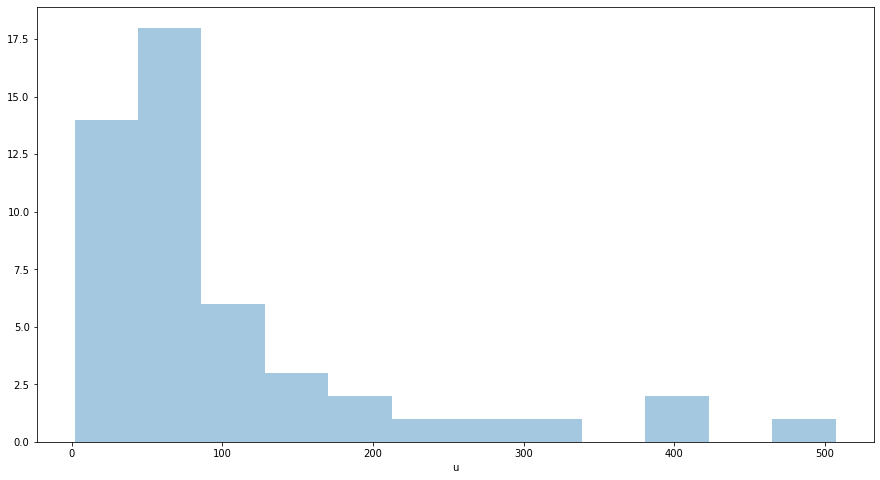

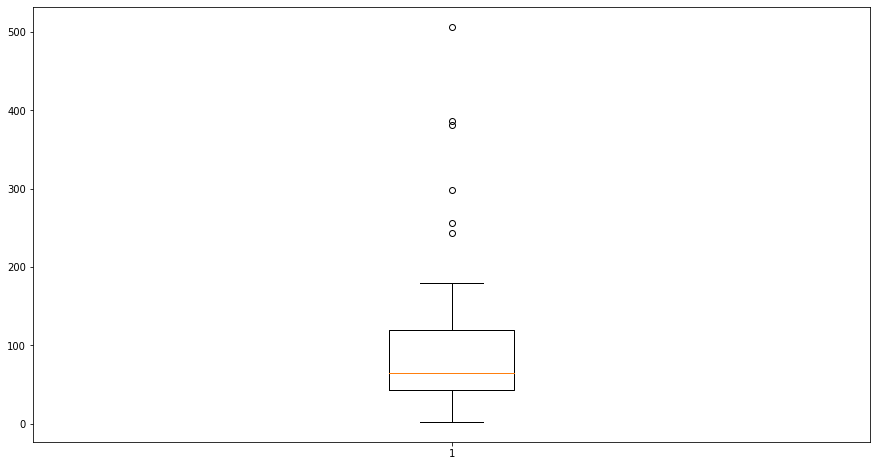

Variance in u : 10900.416666666662
STD in u : 104.40506054146351


In [8]:
# U

sns.distplot(df.u,kde=False)
plt.show()
plt.boxplot(df.u)
plt.show()

print('Variance in u :',df.u.var())
print('STD in u :',df.u.std())

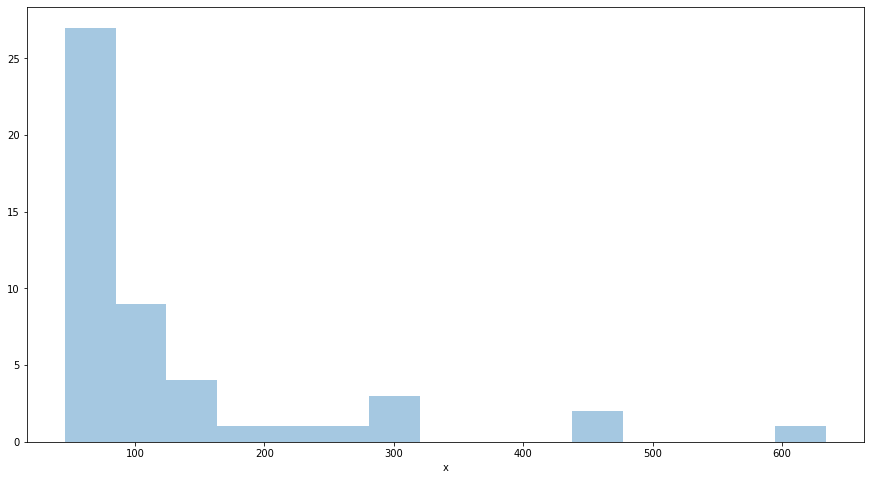

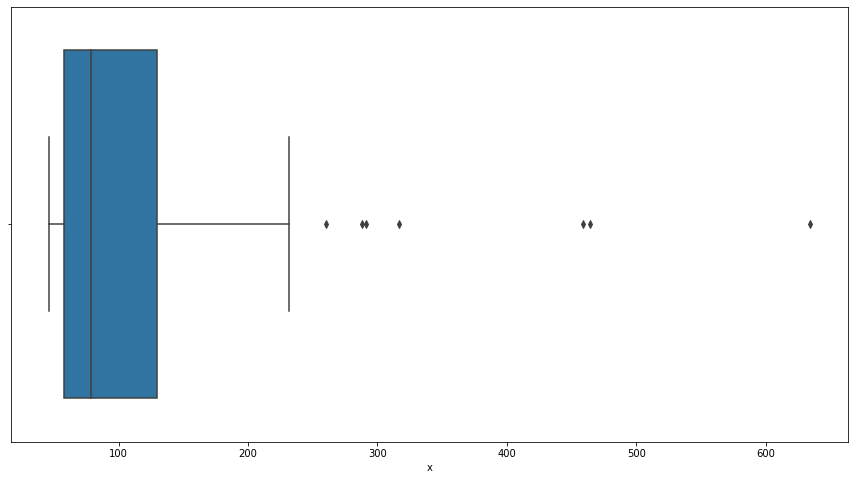

Variance in x : 15158.832482993197
STD in x : 123.12121053252034


In [9]:
# X

sns.distplot(df.x,kde=False)
plt.show()
sns.boxplot(df.x)
plt.show()

print('Variance in x :',df.x.var())
print('STD in x :',df.x.std())

# 4. Explore relationships between variables using scatterplots and two-way cross tabulations

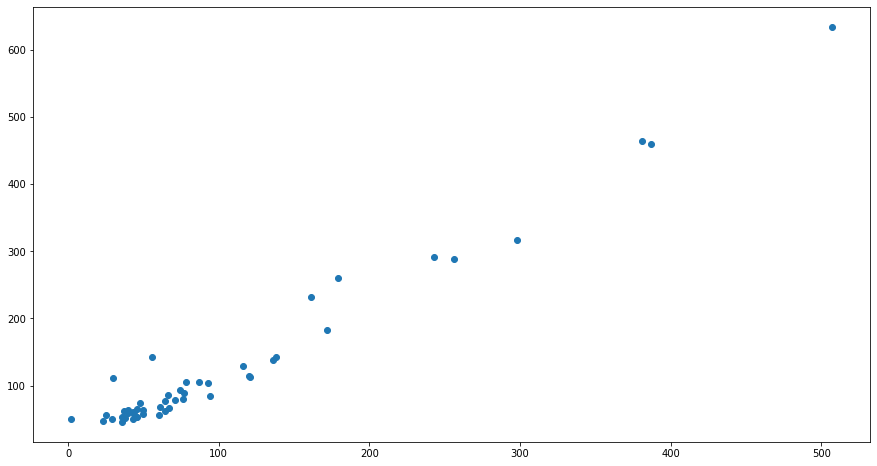

In [11]:
plt.scatter(df.u,df.x)

* Seems to be a linear relation.
* If population in 1930 increases, same happens in 1940

In [25]:
pd.crosstab(df.u,df.x)

x,46,48,50,52,53,54,57,58,60,61,...,143,183,232,260,288,291,317,459,464,634
u,,,,,,,,,,,,,,,,,,,,,
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
38,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
40,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# 5. Transform the dataset
Find the number of rows in given dataset and separate the input and target variables into X and Y. Hint: You can shape function 
to get the size of the dataframe

In [8]:
X = df[['u']]  #INPUT
Y = df[['x']]  #Target

print('X Shape :',X.shape)
print('Y Shape :',Y.shape)

X Shape : (49, 1)
Y Shape : (49, 1)


# 6. Check the dataset for any missing values and also print out the correlation matrix
You can use .isna() and .corr() functions to check NA's and correlation in the dataframe respectively

In [9]:
df.isna().sum()

# Data is NOT Missing

u    0
x    0
dtype: int64

In [10]:
df.corr()

# High Correlation exists between both variables

,u,x
u,1.000000,0.981742
x,0.981742,1.000000


The high correlation betwwen u and x indicates that the variable u is a good predictor of variable x

# 7. Split data into train, test sets
Divide the data into training and test sets with 80-20 split using scikit-learn. Print the shapes of training and test feature 
sets.*
Check: train_test_split function

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X,Y,test_size=0.20)
print('XTrain Shape :',xtrain.shape)
print('XTest Shape :',xtest.shape)
print('YTrain Shape :',ytrain.shape)
print('YTest Shape :',ytest.shape)

XTrain Shape : (39, 1)
XTest Shape : (10, 1)
YTrain Shape : (39, 1)
YTest Shape : (10, 1)


# 8. Find coefficients & intercept
Estimate the coefficients b0 and b1 using scikit-learn.
Check: coef_ and intercept_ functions can help you get coefficients & intercept

In [12]:
lr = LinearRegression()

model = lr.fit(xtrain,ytrain)
beta1 = model.coef_
beta0 = model.intercept_

print('Coefficient :',beta1[0][0])
print('Intercept :',beta0[0])

Coefficient : 1.1840692476604635
Intercept : 7.163633687367607


# 9.  Linear Relationship between feature and target
Plot the line with b1 and b0 as slope and y-intercept.

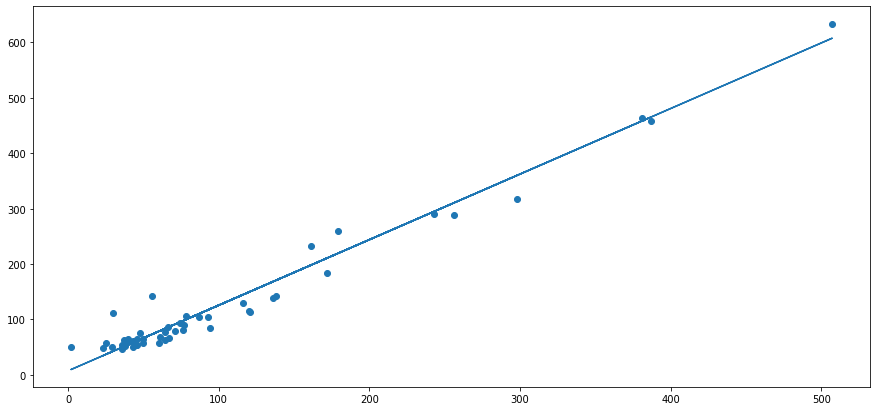

In [13]:
plt.figure(figsize=(15,7))
plt.plot(X,beta0+beta1*X)
plt.scatter(X,Y)
plt.show()

# 10. Evaluation of model with scikit-learn
Validate the model with Root Mean Squares error and R^2 score using scikit-learn. RMSE and R2 for test data and prediction

Hint: You can import mean_squared_error function & r2 (R square) from sklearn.metrics. Performing root operation over mean 
square error over mean square error gives you root mean square error

In [14]:
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.api import OLS

lr = LinearRegression()
model = lr.fit(xtrain,ytrain)
preddd = model.predict(xtest)
print('RMSE :',np.sqrt(mean_squared_error(ytest,preddd)))
print('R2Score :',r2_score(ytest,preddd))

RMSE : 25.38498802007491
R2Score : 0.8829536305071217


# 11. Calculate the accuracy of the model for both training and test data set

Hint: .score() function

In [15]:
print('Accuracy of Model for Training Set : {}%'.format(np.round(100*model.score(xtrain,ytrain),2)))
print('Accuracy of Model for Testing Set  : {}%'.format(np.round(100*model.score(xtest,ytest),2)))

Accuracy of Model for Training Set : 96.93%
Accuracy of Model for Testing Set  : 88.3%
